In [1]:
%matplotlib notebook


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('Lipid_fatty_acids_geno_chr4_9_PS.csv')

# treat most columns as numbers
except_columns = ['Genotype','chr4','chr9']
for col in df.columns:
    if col not in except_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.keys()

Index(['Genotype', 'chr4', 'chr9', 'MGDG', 'DGDG', 'SQDG', 'PG', 'PIPE', 'PC',
       'PG_16_0', 'PG_16_1', 'PG_18_0', 'PG_18_2', 'PG_18_3', 'MGDG_16_0',
       'MGDG_18_2', 'MGDG_18_3', 'DGDG_16_0', 'DGDG_18_2', 'DGDG_18_3',
       'PC_16_0', 'PC_18_1', 'PC_18_2', 'PC_18_3', 'SQDG_16_0', 'SQDG_18_0',
       'SQDG_18_1', 'SQDG_18_2', 'SQDG_18_3', 'PEPI_16_0', 'PEPI_18_1',
       'PEPI_18_2', 'PEPI_18_3', 'DGDG/MGDG', 'LT_DEPI_phi2_81',
       'LT_DEPI_qIt_81', 'LT_DEPI_qL_81'],
      dtype='object')

In [10]:
df

,Genotype,chr4,chr9,MGDG,DGDG,SQDG,PG,PIPE,PC,PG_16_0,...,SQDG_18_2,SQDG_18_3,PEPI_16_0,PEPI_18_1,PEPI_18_2,PEPI_18_3,DGDG/MGDG,LT_DEPI_phi2_81,LT_DEPI_qIt_81,LT_DEPI_qL_81
0,1,AA,AA,32.674800,21.107872,4.714892,12.785509,8.947110,14.533786,29.858138,...,7.952133,52.136641,31.516215,2.727575,34.216777,30.203453,0.645999,0.518811,1.539135,0.521250
1,2,AA,AA,33.658687,22.162136,4.578617,11.908270,8.697145,15.137336,27.720849,...,6.410688,51.957244,32.126814,2.264457,30.928389,32.413643,0.658437,0.375548,1.941258,0.364375
2,4,AA,BB,31.357040,22.035483,5.607614,10.991483,9.907516,15.306449,26.072732,...,8.465794,55.675683,32.368757,1.935332,33.683595,31.339341,0.702728,0.132851,4.595215,0.198375
3,5,AA,BB,34.717512,25.202439,4.747148,11.406167,10.280807,15.803077,29.495141,...,5.725940,53.370966,32.941406,1.420544,32.543936,32.785023,0.725929,0.264331,2.600429,0.264400
4,6,AA,BB,31.949453,21.379684,4.728548,12.402947,10.507827,16.634852,29.933771,...,5.678220,55.615488,32.622747,2.171528,32.588809,31.390688,0.669172,0.323928,1.998067,0.316020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,109,BB,AA,31.066302,24.843160,4.978756,9.811169,11.650300,18.347995,35.738846,...,7.350517,46.984041,32.368069,2.101505,30.575840,32.604981,0.799682,0.566808,1.574514,0.615050
76,111,BB,AA,33.564941,23.049252,4.879458,11.889841,9.908019,16.694808,29.918113,...,8.158256,NaN,29.457111,2.559436,34.671586,30.455896,0.686706,0.572712,1.263461,0.594675
77,112,BB,BB,32.699753,21.555775,5.421652,9.279643,11.001769,16.723174,29.762713,...,6.132886,49.590586,30.115070,2.205466,34.213824,30.019706,0.659203,0.472187,1.323545,0.433175
78,24-125B-1,BB,BB,31.081661,22.675466,5.776590,11.907155,10.389606,17.122344,32.050000,...,7.430000,50.410000,35.700000,2.130000,30.550000,29.590000,0.729545,0.346075,1.937947,0.353109


In [11]:
genotype_colors = ['red', 'orange', 'green', 'blue']
# set(df['chr4'])
df['QTL-genotype'] = None

qtl_genotype_colors = {
    'AAAA':'grey',
    'AABB':'purple',
    'BBAA':'orange',
    'BBBB':'grey'
}

for genotype in set(df['Genotype']):
    selected = df[df['Genotype'] == genotype]
    index = selected.index[0]
    
    chr4 = selected.loc[index, 'chr4']
    chr9 = selected.loc[index, 'chr9']
    
    if (chr4 == 'AA'):
        if (chr9 == 'AA'):
            df.loc[index, 'QTL-genotype'] = 'AAAA'
        elif (chr9 == 'BB'):
            df.loc[index, 'QTL-genotype'] = 'AABB'
    elif (chr4 == 'BB'):
        if (chr9 == 'AA'):
            df.loc[index, 'QTL-genotype'] = 'BBAA'
        elif (chr9 == 'BB'):
            df.loc[index, 'QTL-genotype'] = 'BBBB'
    else:
        df.loc[index,'QTL-genotype'] = None

<IPython.core.display.Javascript object>


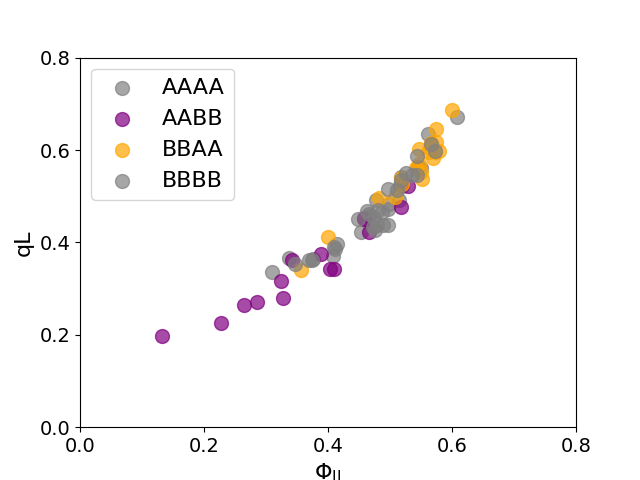

In [12]:
x_param = "LT_DEPI_phi2_81"
y_param = "LT_DEPI_qL_81"

plt.figure()

for qtl_genotype,color in qtl_genotype_colors.items():
    selected = df[df['QTL-genotype'] == qtl_genotype]
    plt.scatter(selected[x_param], selected[y_param], color=color, label=qtl_genotype,alpha=0.7,s=100)
    
plt.xlabel("$\mathregular{Φ_{II}}$",size=16)
plt.ylabel("qL",size=16)

plt.xticks(np.arange(0, 0.8+1, 0.2),size=14)
plt.yticks(np.arange(0, 0.8+1, 0.2),size=14)
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.legend(fontsize=16)

plt.show()
plt.savefig(x_param+y_param,dpi=600)

<IPython.core.display.Javascript object>


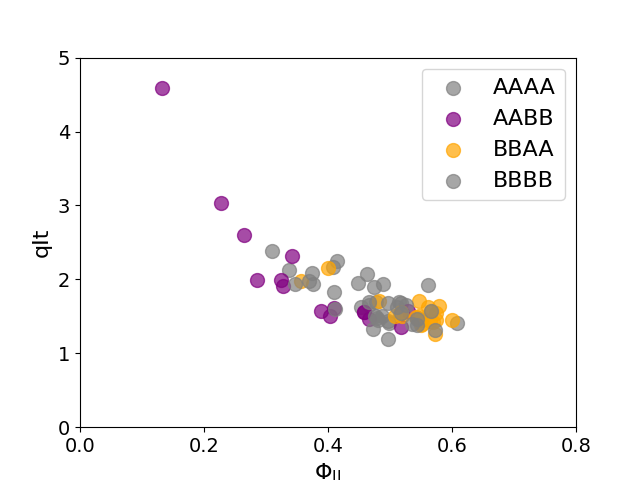

In [13]:
x_param = "LT_DEPI_phi2_81"
y_param = "LT_DEPI_qIt_81"

plt.figure()

for qtl_genotype,color in qtl_genotype_colors.items():
    selected = df[df['QTL-genotype'] == qtl_genotype]
    plt.scatter(selected[x_param], selected[y_param], color=color, label=qtl_genotype,alpha=0.7,s=100)
    
plt.xlabel("$\mathregular{Φ_{II}}$",size=16)
plt.ylabel("qIt",size=16)
plt.xticks(np.arange(0, 0.8+1, 0.2),size=14)
plt.yticks(size=14)
plt.xlim(0,0.8)
plt.ylim(0, 5)
plt.legend(fontsize=16)

plt.show()
plt.savefig(x_param+y_param,dpi=600)